In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Data loading and exploration
df = pd.read_csv('owid-covid-data.csv')
print(df.head())
# checking datasets' columns
print(df.columns)
#Preview the first rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN        

In [4]:
# task 2: Data cleaning
# filter my dataset to include only the countries of interest
countries_of_interest = ['Kenya', 'Uganda', 'Tanzania']
df_filtered = df[df['location'].isin(countries_of_interest)]

# drop rows with missing dates or critical values
df_filtered = df_filtered.dropna(subset=['date', 'total_cases'])
# Convert the date column to datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
# handling missing numeric values using interpolkation
df_filtered['total_deaths'] = df_filtered['total_deaths'].interpolate(method='linear')
df_filtered['total_tests'] = df_filtered['total_tests'].fillna(0)

print(df_filtered)

       iso_code continent location       date  total_cases  new_cases  \
79698       KEN    Africa    Kenya 2020-03-13          1.0        1.0   
79699       KEN    Africa    Kenya 2020-03-14          1.0        0.0   
79700       KEN    Africa    Kenya 2020-03-15          3.0        2.0   
79701       KEN    Africa    Kenya 2020-03-16          3.0        0.0   
79702       KEN    Africa    Kenya 2020-03-17          3.0        0.0   
...         ...       ...      ...        ...          ...        ...   
154952      UGA    Africa   Uganda 2022-03-01     163342.0       35.0   
154953      UGA    Africa   Uganda 2022-03-02     163342.0        0.0   
154954      UGA    Africa   Uganda 2022-03-03     163383.0       41.0   
154955      UGA    Africa   Uganda 2022-03-04     163383.0        0.0   
154956      UGA    Africa   Uganda 2022-03-05     163383.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
79698                  NaN           NaN      

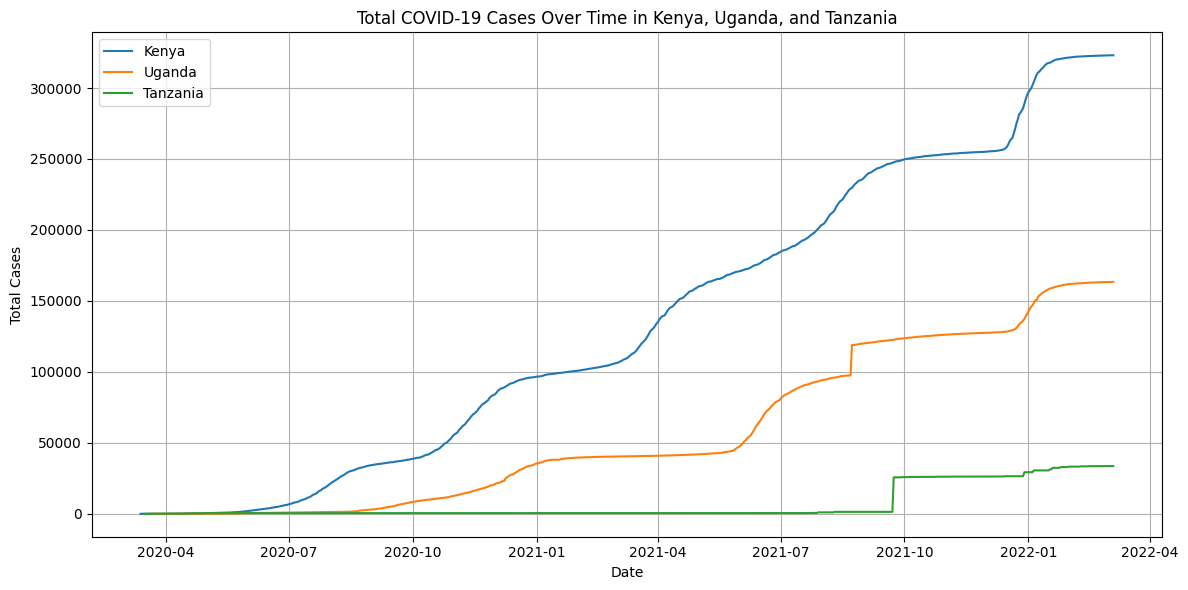

In [ ]:
# task 3: Performing EDA on the data
# line plot of total cases over time for the three countries
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time in Kenya, Uganda, and Tanzania')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('total_cases_over_time.png')
plt.show()

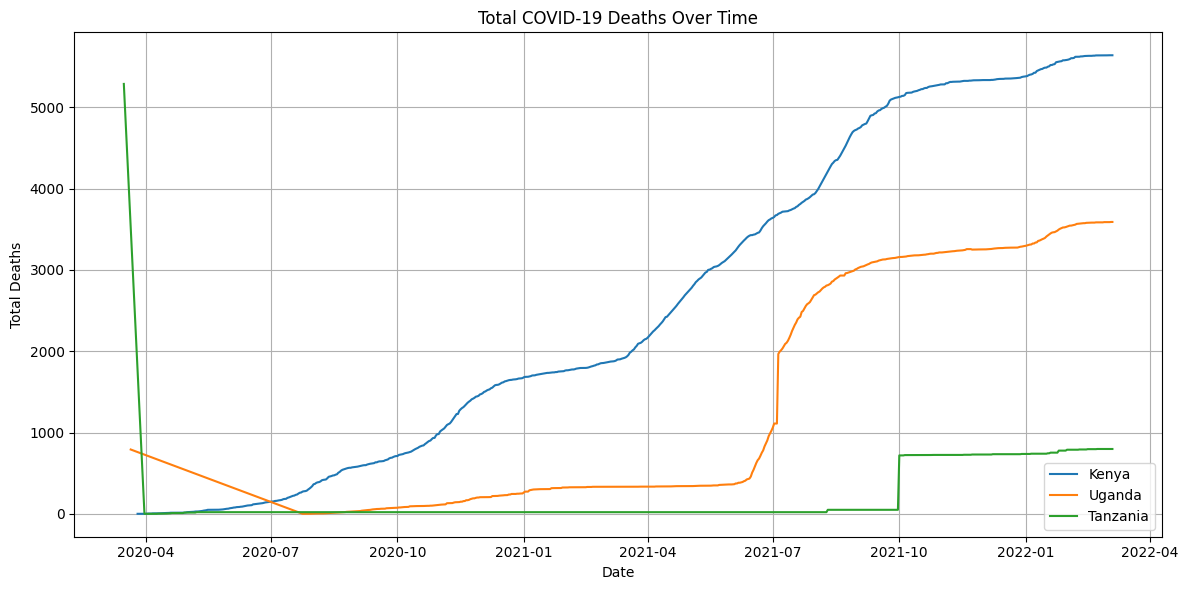

In [6]:
# Line chart for total deaths over time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

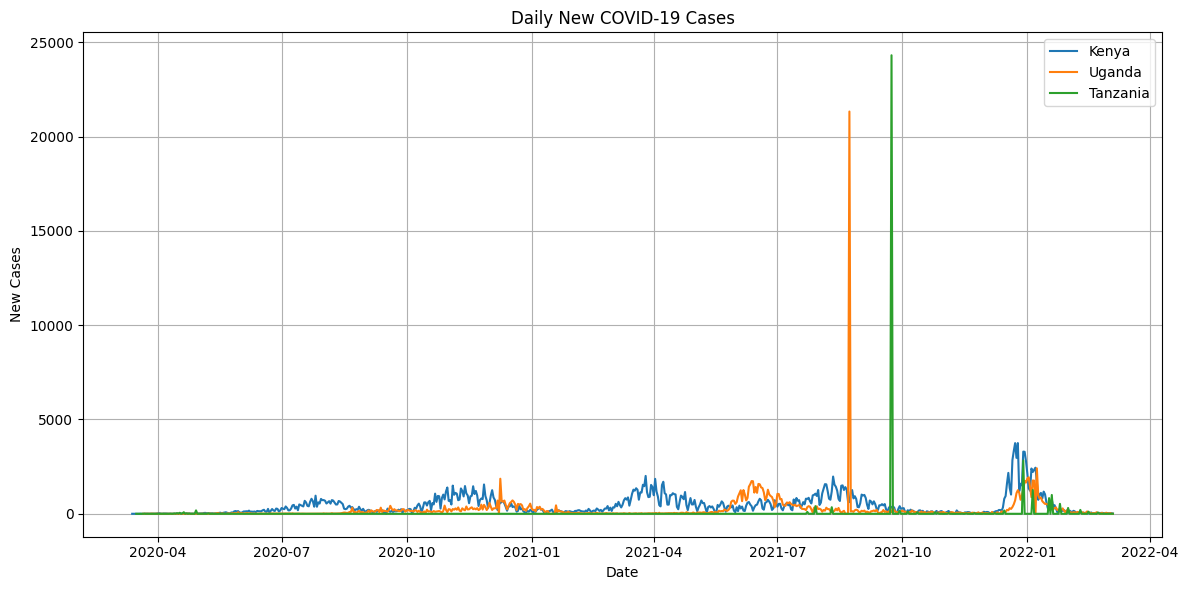

In [7]:
# compareing new daily cases between the three countries
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23664\1807730759.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='total_cases', y='location', palette='viridis')


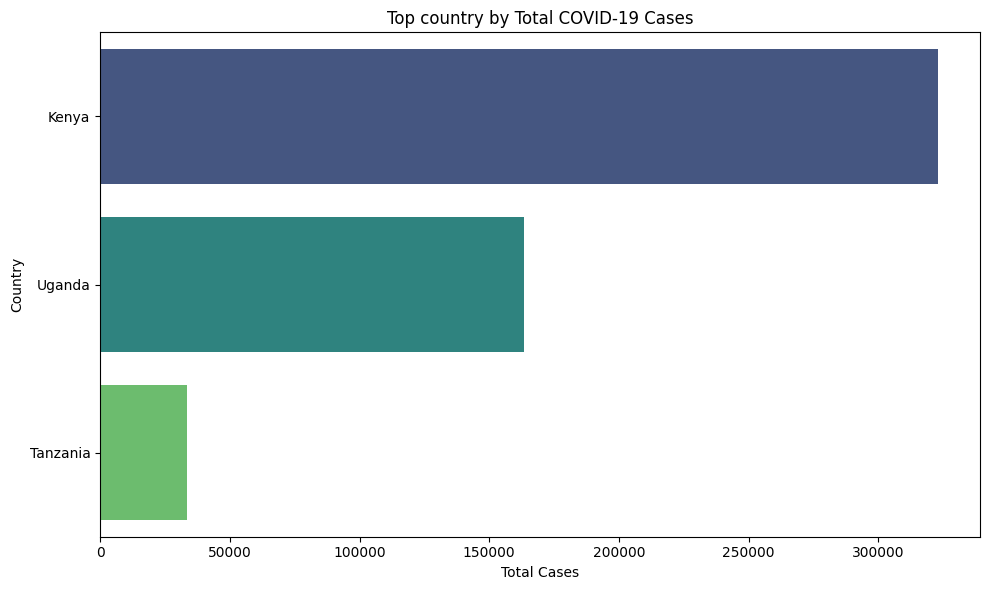

In [8]:
# Visualizing the top countries by total cases using a bar chart
latest_data = df_filtered.sort_values('date').groupby('location').tail(1)
top_countries = latest_data.sort_values(by='total_cases', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='total_cases', y='location', palette='viridis')
plt.title('Top country by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

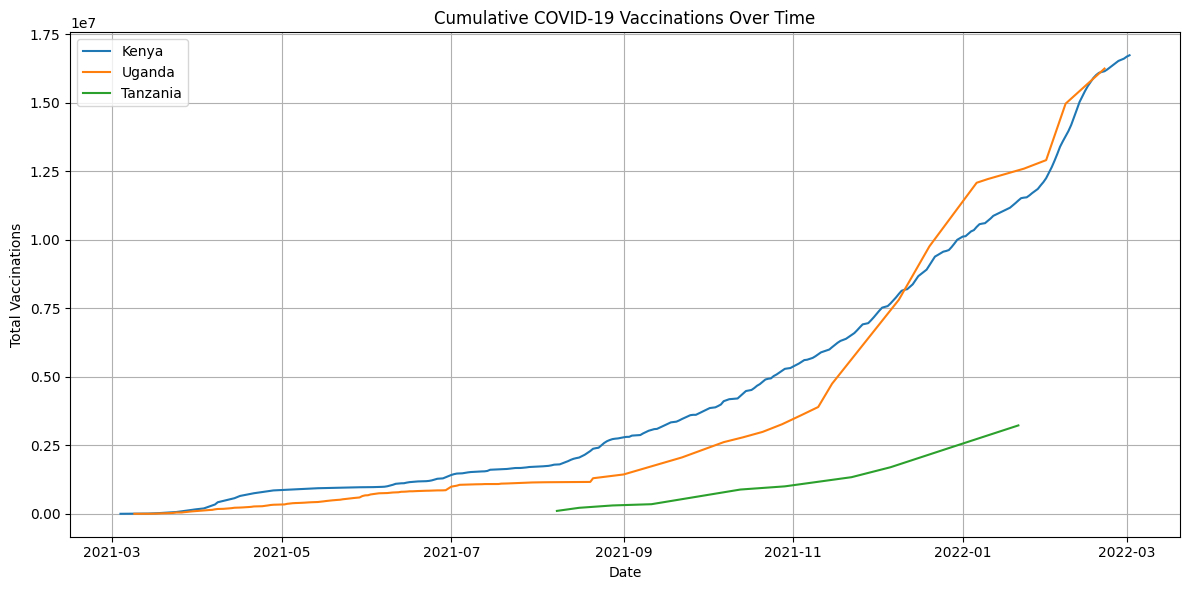

In [10]:
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    country_data = country_data.dropna(subset=['total_vaccinations'])  # Drop missing values
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_23664\902801807.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaccinated_subset, x='percent_vaccinated', y='location', palette='Blues_d')


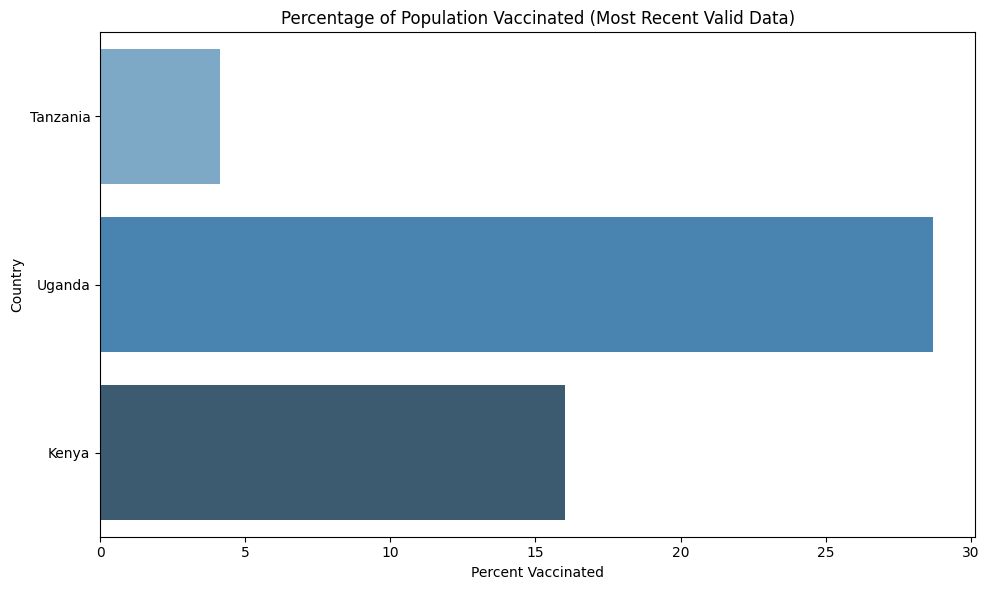

In [ ]:
# For each country, getting the latest date where people_vaccinated is NOT null
latest_vax_data = df_filtered[df_filtered['people_vaccinated'].notna()].sort_values('date').groupby('location').tail(1)

# Computing % vaccinated
latest_vax_data['percent_vaccinated'] = (latest_vax_data['people_vaccinated'] / latest_vax_data['population']) * 100

# Filtering only the countries of interest
vaccinated_subset = latest_vax_data[latest_vax_data['location'].isin(countries_of_interest)]

# Bar chart Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=vaccinated_subset, x='percent_vaccinated', y='location', palette='Blues_d')
plt.title('Percentage of Population Vaccinated (Most Recent Valid Data)')
plt.xlabel('Percent Vaccinated')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


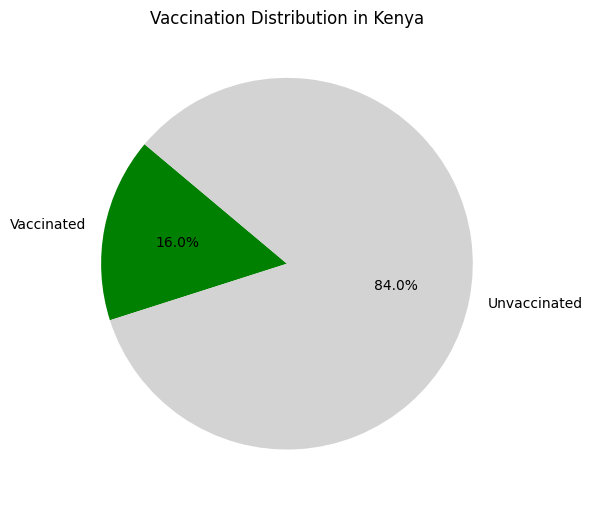

In [16]:
# Example for Kenya
kenya = latest_vax_data[latest_vax_data['location'] == 'Kenya'].iloc[0]
vaccinated = kenya['people_vaccinated']
population = kenya['population']
unvaccinated = population - vaccinated

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie([vaccinated, unvaccinated],
        labels=['Vaccinated', 'Unvaccinated'],
        autopct='%1.1f%%',
        colors=['green', 'lightgray'],
        startangle=140)
plt.title('Vaccination Distribution in Kenya')
plt.tight_layout()
plt.show()


In [20]:
# Convert the 'date' column to datetime format
import plotly.express as px
df['date'] = pd.to_datetime(df['date'])

# Get the latest date in the dataset
latest_date = df['date'].max()

# Filter the data for the latest date
latest_data = df[df['date'] == latest_date][['iso_code', 'total_cases']]

# Preview the latest data
latest_data.head()
# Create a choropleth map
fig = px.choropleth(latest_data, 
                    locations='iso_code', 
                    color='total_cases', 
                    hover_name='iso_code', 
                    color_continuous_scale='Viridis', 
                    labels={'total_cases': 'Total Cases'},
                    title=f'COVID-19 Total Cases by Country on {latest_date.date()}')

# Show the map
fig.show()
